In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
# Generate a synthetic sine wave time series
time_steps = np.linspace(0, 100, 500)
data = np.sin(time_steps) + np.random.normal(scale=0.1, size=len(time_steps))

# Convert data to DataFrame
df = pd.DataFrame(data, columns=["Value"])


In [3]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(df)

# Create sequences of 50 time steps
sequence_length = 50
X = []
y = []

for i in range(sequence_length, len(data_normalized)):
    X.append(data_normalized[i-sequence_length:i, 0])
    y.append(data_normalized[i, 0])

X, y = np.array(X), np.array(y)

# Reshape X to be compatible with LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [4]:
# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - loss: 0.2128 - val_loss: 0.1249
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0957 - val_loss: 0.0738
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0644 - val_loss: 0.0591
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0559 - val_loss: 0.0496
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0458 - val_loss: 0.0410
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0362 - val_loss: 0.0279
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0222 - val_loss: 0.0266
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0296 - val_loss: 0.0321
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0306 - val_loss: 0.0275
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0270 - val_loss: 0.0247
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0245 - val_loss: 0.0207
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0

In [6]:
# Predict on the training data to evaluate
predictions = model.predict(X)

# Inverse transform predictions to get actual values
predictions = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


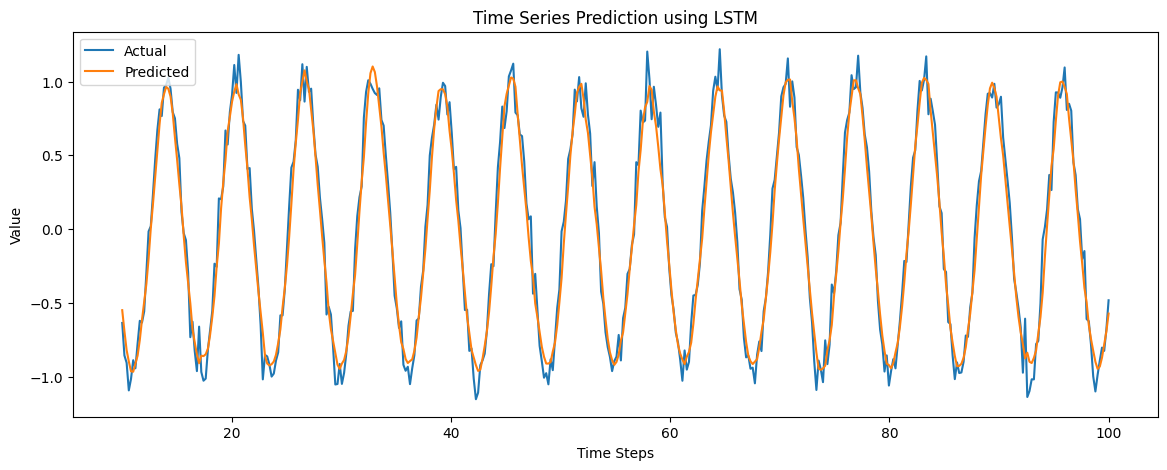

In [7]:
# Plot the predictions and actual values
plt.figure(figsize=(14, 5))
plt.plot(time_steps[sequence_length:], y_actual, label="Actual")
plt.plot(time_steps[sequence_length:], predictions, label="Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Time Series Prediction using LSTM")
plt.legend()
plt.show()
